<a href="https://colab.research.google.com/github/GALI-SAI-SHANKAR/Isomorphism-of-Organic-Compounds/blob/main/Source%20code/Chemical_Graph_Isomorphism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit-pypi

     |████████████████████████████████| 22.5 MB 1.4 MB/s 


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

In [ ]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

In [ ]:
from urllib.request import urlopen
from urllib.parse import quote

def CIRconvert(ids):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(ids) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return 'Did not work'


In [ ]:
c_name1 = input("Enter Chemical Name : ")
s_formula1 = CIRconvert(c_name1)
print(s_formula1)
mol1 = Chem.MolFromSmiles(s_formula1)
# Default
# mol1
mol_with_atom_index(mol1)

In [ ]:
c_name2 = input("Enter Chemical Name : ")
s_formula2 = CIRconvert(c_name2)
print(s_formula2)
mol2 = Chem.MolFromSmiles(s_formula2)
mol_with_atom_index(mol2)

In [ ]:
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers, StereoEnumerationOptions
isomers = tuple(EnumerateStereoisomers(mol1))
len(isomers)

In [ ]:
for smi in sorted(Chem.MolToSmiles(x, isomericSmiles=True) for x in isomers):
    print(smi)
    isomer = Chem.MolFromSmiles(smi)
    mol_with_atom_index(isomer)

In [ ]:
!pip install pysmiles

In [ ]:
from pysmiles import read_smiles
import networkx as nx
    
# smiles = 'CCCC'
mol_1 = read_smiles(s_formula1)
mol_2 = read_smiles(s_formula2)
    
# atom vector (C only)
nodes_c1 = mol_1.nodes(data='element')
nodes_c2 = mol_2.nodes(data='element')

# adjacency matrix
adj_matrix_c1 = nx.to_numpy_matrix(mol_1)
adj_matrix_c2 = nx.to_numpy_matrix(mol_2)

print(nodes_c1)
print(adj_matrix_c1)

print(nodes_c2)
print(adj_matrix_c2)

In [ ]:
!pip install networkx

In [ ]:
from networkx.algorithms import isomorphism
import networkx as nx

G1 = nx.from_numpy_matrix(adj_matrix_c1)
G2 = nx.from_numpy_matrix(adj_matrix_c2)
GM = isomorphism.GraphMatcher(G1, G2)
GM.is_isomorphic()


In [ ]:
import numpy as np
# Example Matrix
adj_matrix_c1 = np.array([[0, 1, 0, 0, 0], 
                          [1, 0, 1, 0, 1],
                          [0, 1, 0, 1, 1],
                          [0, 0, 1, 0, 1],
                          [0, 1, 1, 1, 0]])

adj_matrix_c2 = np.array([[0, 1, 1, 1, 0], 
                          [1, 0, 1, 0, 0],
                          [1, 1, 0, 1, 0],
                          [1, 0, 1, 0, 1],
                          [0, 0, 0, 1, 0]])

In [ ]:
print(type(adj_matrix_c1))
x = np.array_equal(adj_matrix_c1,adj_matrix_c2,equal_nan=True)
print(x)
if x:
    print('True')
    x = adj_matrix_c1.shape
    print(type(x))

<class 'numpy.ndarray'>
False


In [ ]:
import numpy as np
def degrees(adj_matrix):
    n = adj_matrix.shape[0]
    degree_sequence = []
    y = np.asarray(adj_matrix)
    for i in range(n):
        count = np.count_nonzero(y[i] == 1)
        degree_sequence.append(count)
    return degree_sequence

In [ ]:
import numpy as np
def degrees_positions(adj_matrix):
    n = adj_matrix.shape[0]
    keys = range(n)
    d = dict(zip(keys, ([] for _ in keys)))
    y = np.asarray(adj_matrix)
    for i in range(n):
        count = np.count_nonzero(y[i] == 1)
        d[i].append(count)
    return d

In [ ]:
def next_positions(node):
  y = np.asarray(node)
  next_nodes = []
  for i in range(len(y)):
    if y[i] == 1:
      next_nodes.append(i)
  return next_nodes

In [ ]:
from operator import itemgetter
def GraphMatcher(adj_matrix_c1, adj_matrix_c2):
    adj_matrix_equal = np.array_equal(adj_matrix_c1,adj_matrix_c2,equal_nan=True)
    if adj_matrix_equal:   
        return True
    else:
        nodes_equal = adj_matrix_c1.shape == adj_matrix_c1.shape
        if nodes_equal:
            if np.array_equal(np.sort(degrees(adj_matrix_c1)), np.sort(degrees(adj_matrix_c2)), equal_nan=True):
                if np.array_equal(degrees(adj_matrix_c1),degrees(adj_matrix_c2),equal_nan=True):
                    return True
                else:
                    n = adj_matrix_c1.shape[0]
                    x = degrees_positions(adj_matrix_c1)
                    y = degrees_positions(adj_matrix_c2)
                    nodes_x = sorted(x.items(), key=itemgetter(1))[:n]
                    nodes_y = sorted(y.items(), key=itemgetter(1))[:n]

                    flag = False
                    for i in range(n):
                      if nodes_x[i][0] == nodes_x[i][0]:
                        print('out',nodes_x[i][0],nodes_y[i][0])
                        next_nodes_x = next_positions(adj_matrix_c1[nodes_x[i][0]])
                        next_nodes_y = next_positions(adj_matrix_c2[nodes_y[i][0]])
                        nnl = len(next_nodes_x)

                        for j in range(nnl):
                            if x.get(next_nodes_x[j])==y.get(next_nodes_y[j]):
                              print(next_nodes_x[j],next_nodes_y[j])
                              next_nodes_x= next_positions(adj_matrix_c1[next_nodes_x[j]])
                              next_nodes_y= next_positions(adj_matrix_c2[next_nodes_y[j]])
                              print('in',next_nodes_x,next_nodes_y)
                              nnl += len(next_nodes_x)
                    return flag
            else:
              return False
        else:
            return False

GraphMatcher(adj_matrix_c1, adj_matrix_c2)

In [ ]:

from operator import itemgetter
def GraphMatcher(adj_matrix_c1, adj_matrix_c2):
    adj_matrix_equal = np.array_equal(adj_matrix_c1,adj_matrix_c2,equal_nan=True)
    if adj_matrix_equal:   
        return True
    else:
        nodes_equal = adj_matrix_c1.shape == adj_matrix_c1.shape
        if nodes_equal:
            if np.array_equal(np.sort(degrees(adj_matrix_c1)), np.sort(degrees(adj_matrix_c2)), equal_nan=True):
                if np.array_equal(degrees(adj_matrix_c1),degrees(adj_matrix_c2),equal_nan=True):
                    return True
                else:
                    n = adj_matrix_c1.shape[0]
                    x = degrees_positions(adj_matrix_c1)
                    y = degrees_positions(adj_matrix_c2)
                    nodes_x = sorted(x.items(), key=itemgetter(1))[:n]
                    nodes_y = sorted(y.items(), key=itemgetter(1))[:n]
                    visited_nodes_x=[]
                    visited_nodes_y=[]

                    flag = False

                    for i in range(n):
                      if nodes_x[i][0] == nodes_x[i][0]:
                        next_nodes_x = next_positions(adj_matrix_c1[nodes_x[i][0]])
                        next_nodes_y = next_positions(adj_matrix_c2[nodes_y[i][0]])
                        nnl = len(next_nodes_x)
                        visited_nodes_x.append(nodes_x[i][0])
                        visited_nodes_y.append(nodes_y[i][0])
                        print('visited nodes : ',visited_nodes_x,visited_nodes_y)
                        print('next noodes : ',next_nodes_x,next_nodes_y)
                       
                        j = 0
                        while j < nnl:
                            if x.get(next_nodes_x[j])==y.get(next_nodes_y[j]):
                              print('Selected Nodes : ',next_nodes_x[j],next_nodes_y[j])
                              visited_nodes_x.append(next_nodes_x[j])
                              visited_nodes_y.append(next_nodes_y[j]) 
                              print('visited nodes : ',visited_nodes_x,visited_nodes_y)

                              next_nodes_x= next_positions(adj_matrix_c1[next_nodes_x[j]])
                              next_nodes_y= next_positions(adj_matrix_c2[next_nodes_y[j]])

                              next_nodes_x = list(set(next_nodes_x).difference(visited_nodes_x))
                              next_nodes_y = list(set(next_nodes_y).difference(visited_nodes_y))
                              print('next noodes : ',next_nodes_x,next_nodes_y)

                              nnl = len(next_nodes_x)
                              flag_next = True
                            else: 
                              break
                            
                            if flag_next:
                              j = 0
                            else:
                              j+=1

                            if not next_nodes_x:
                              flag = True
                              break
                        if flag:
                          flag = True
                          break

                        visited_nodes_x = []
                        visited_nodes_y = []
                    return flag
            else:
              return False
        else:
            return False

if GraphMatcher(adj_matrix_c1, adj_matrix_c2):
  print('Isomorphic')
else:
  print('Not Isomorphic')

visited nodes :  [0] [4]
next noodes :  [1] [3]
Selected Nodes :  1 3
visited nodes :  [0, 1] [4, 3]
next noodes :  [2, 4] [0, 2]
Selected Nodes :  2 0
visited nodes :  [0, 1, 2] [4, 3, 0]
next noodes :  [3, 4] [1, 2]
Selected Nodes :  3 1
visited nodes :  [0, 1, 2, 3] [4, 3, 0, 1]
next noodes :  [4] [2]
Selected Nodes :  4 2
visited nodes :  [0, 1, 2, 3, 4] [4, 3, 0, 1, 2]
next noodes :  [] []
Isomorphic


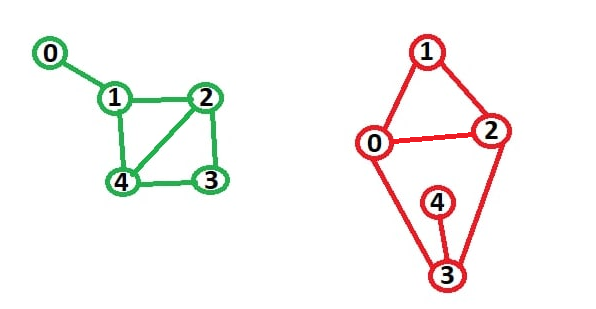

In [ ]:
print(degrees(adj_matrix_c1))
print(degrees(adj_matrix_c2))
print(np.sort(degrees(adj_matrix_c1)))
print(np.sort(degrees(adj_matrix_c2)))
np.array_equal(degrees(adj_matrix_c1),degrees(adj_matrix_c2),equal_nan=True)

In [ ]:
x = degrees_positions(adj_matrix_c1)
y = degrees_positions(adj_matrix_c2)
print(x,y)
i = min(x, key=x.get)
i

In [ ]:
from operator import itemgetter
n = adj_matrix_c1.shape[0]
e = sorted(x.items(), key=itemgetter(1))[:n]
print(e)
e[2][0]